# Day of Week Visualizations

This is some visualization of week-scale periodic behaviour.

In [1]:
! pip install pandas matplotlib

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import dataset from df.pickle
df = pd.read_pickle("data/cleaned.pickle")
df.describe()

,active,reactive,volts,amps,sub1,sub2,sub3,house
count,2.049362e+06,2.049362e+06,2.049362e+06,2.049362e+06,2.049362e+06,2.049362e+06,2.049362e+06,2.049362e+06
mean,1.091653e+00,1.237174e-01,2.408398e+02,4.627923e+00,6.731869e-02,7.791520e-02,4.733467e-03,9.416859e-01
std,1.057332e+00,1.127238e-01,3.240001e+00,4.444559e+00,3.691918e-01,3.493239e-01,2.095589e-02,8.293773e-01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.700000e-01
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.760000e-01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.300000e-01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,6.000000e-02,4.000000e-03,1.438000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,5.280000e+00,4.800000e+00,2.880000e-01,8.510000e+00


In [3]:
# Create any working columns for analysis
df['subs'] = df[['sub1','sub2','sub3']].sum(axis=1)
df['house'] = df.active - df.subs

In [4]:
def seasonPlotColumn(colname):
    seasons = ['Winter','Spring','Summer','Fall']
    seasonrs = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
    f, axes = plt.subplots(2, 2,figsize=(8,8), sharex=True, sharey=True)  
    plt.tight_layout(h_pad=3.0)

    colseries = df[colname]
    display("Mean: %.3g SDev: %.3g" % (colseries.mean(), colseries.std()))
    
    for i, ax in enumerate(axes.flatten()):
        season = seasons[i]
        seasonr = seasonrs[i]
        ds = colseries[df.index.month.isin(seasonr)]

        # Plot a trace of hourly average power for each DOW
        g = ds.groupby([ds.index.hour,ds.index.dayofweek]) # df.index.dayofweek,
        ax = g.mean().unstack().plot(ax=ax,grid=True)

        if i<3: 
            ax.get_legend().remove()
        else:
            ax.legend(title="Monday=0",bbox_to_anchor=(1,.5), loc="lower left")

        ax.set_xlabel("hour")
        ax.set_ylabel("Power(kw)")
        ax.set_title("{}: {}".format(season, str(seasonr)))

# Power Plots by Day of Week
### Active Power

'Mean: 1.09 SDev: 1.06'

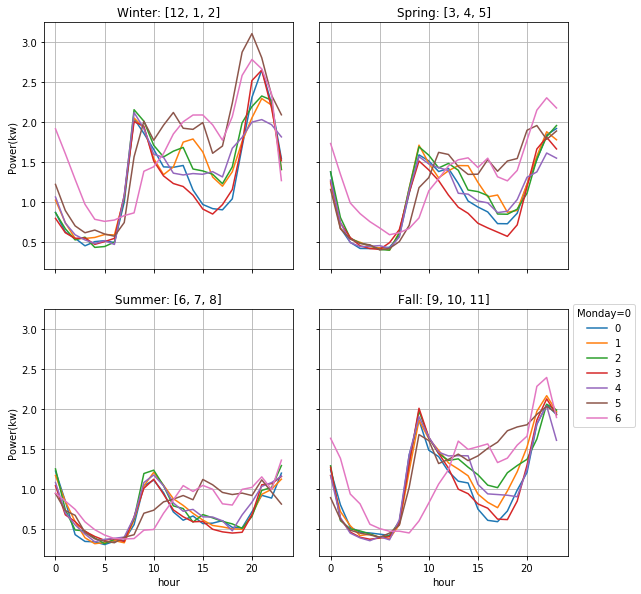

In [5]:
seasonPlotColumn('active')

### Sub1: Kitchen

'Mean: 0.0673 SDev: 0.369'

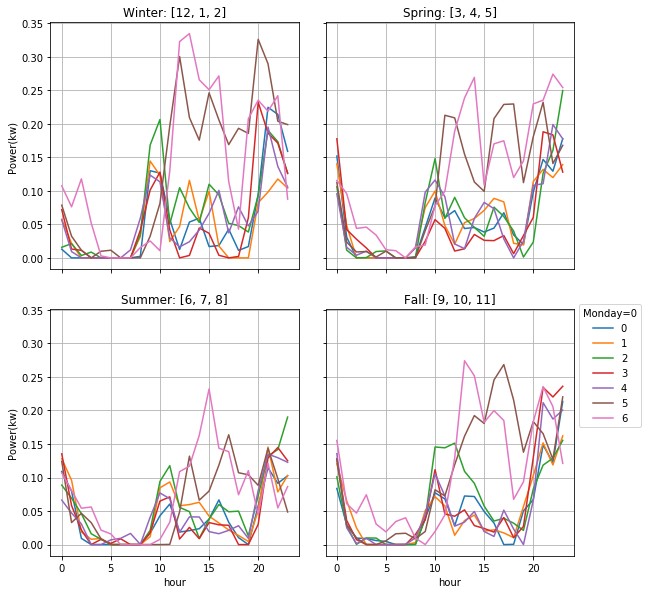

In [6]:
seasonPlotColumn('sub1')

### Sub2: Laundry

'Mean: 0.0779 SDev: 0.349'

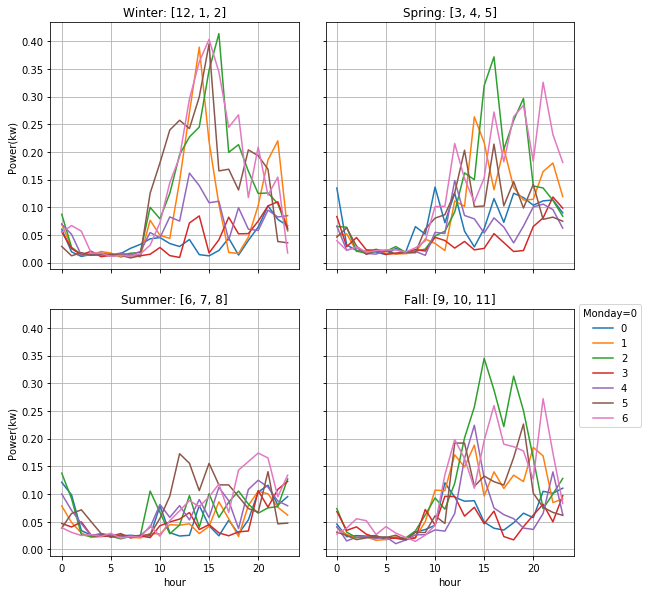

In [7]:
seasonPlotColumn('sub2')

### Sub3: Mechanical

'Mean: 0.00473 SDev: 0.021'

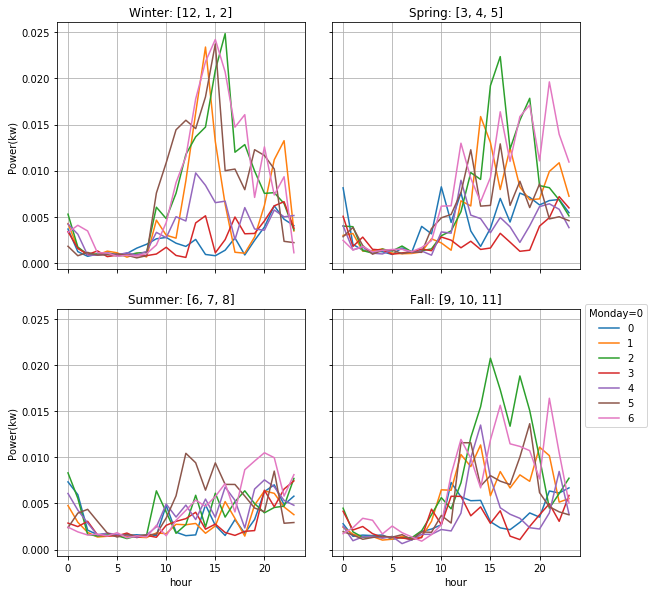

In [8]:
seasonPlotColumn('sub3')

### House: Active less submeters

'Mean: 0.942 SDev: 0.829'

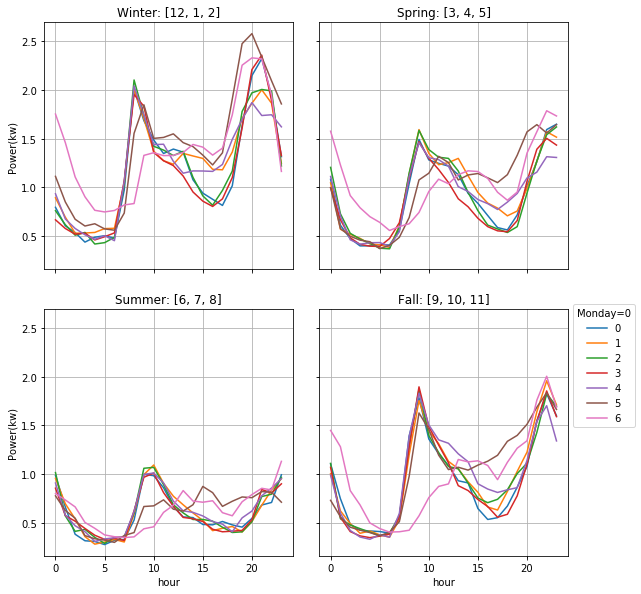

In [9]:
seasonPlotColumn('house')